In [1]:
import os
import socketserver

In [2]:
class ForkingEchoRequestHandler(socketserver.BaseRequestHandler):

    def handle(self):
        # Echo the back to the client
        while(1):
            data = self.request.recv(6)
            #cur_pid = os.getpid()
            #response = '%s: %s' % (cur_pid, data)
            #self.request.send(bytes(response, "utf-8"))
            self.request.send(data)
        return

In [3]:
class ForkingEchoServer(socketserver.ForkingMixIn, socketserver.TCPServer):
    pass

## Main Function

In [4]:
import socket
import threading

In [5]:
address = ('0.0.0.0', 0)
server = ForkingEchoServer(address, ForkingEchoRequestHandler)
ip, port = server.server_address

In [6]:
t = threading.Thread(target=server.serve_forever)
t.setDaemon(True)
t.start()
print(os.getgid())

1000


In [51]:
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect(('sword.qblab.science', port))

In [61]:
#s.connect((ip, port))
len_sent = s.sendall(bytes("hell world", "utf-8"))

In [57]:
s.sendall(xbytes[0:6000])

In [67]:
sys.getsizeof(xbytes[0:6000]), len(xbytes[0:6000])

(6033, 6000)

In [65]:
s.recv(1000)

b'hell world'

## Numpy Matrix Test

In [27]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time

In [28]:
x = np.eye(2048, dtype=np.uint16)
x = np.ascontiguousarray(x)
xbytes = x.tobytes()

In [29]:
s.sendall(xbytes)

KeyboardInterrupt: 

In [134]:
falk_recv = bytearray(b'')
np_recv = bytearray(b'')
for i in range(sys.getsizeof(xbytes)//65503):
    #print(i)
    s.sendall(xbytes[i*65536:(i+1)*65536])
    #np_recv += xbytes[i*65536:(i+1)*65536]
    #falk_recv += (s.recv(65536))

In [142]:
current_size = 0
buffer = b''
while current_size < 8388641:
    data = s.recv(65536)
    if not data:
        break
    if len(data) + current_size > 8388641:
        data = data[:8388641 -current_size] # trim addtional data
    buffer += data
    current_size += len(data)

KeyboardInterrupt: 

In [137]:
sys.getsizeof(buffer)

8388674

In [135]:
print(sys.getsizeof(falk_recv), sys.getsizeof(np_recv),
      sys.getsizeof(xbytes), sys.getsizeof(xbytes[0:65536]))

56 56 8388641 65569


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint16)

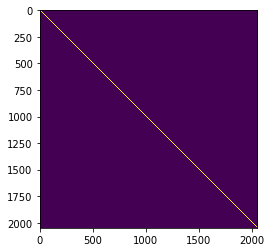

In [131]:
b2i(xbytes)

In [141]:
b2i(buffer)

ValueError: buffer size must be a multiple of element size

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint16)

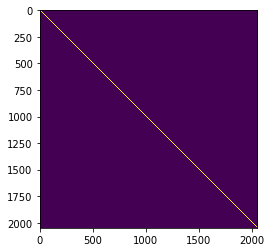

In [126]:
b2i(np_recv)

In [38]:
def b2i(raw):
    image_flat = np.frombuffer(raw, dtype=np.uint16)
    plt.imshow(image_flat.reshape([2048, 2048]))
    return image_flat.reshape([2048, 2048])